In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

## 1.Train set





In [2]:
import pandas as pd
import numpy as np

#Train set
df_train = pd.read_csv('/content/drive/MyDrive/IE403/UIT-ViCTSD/UIT-ViCTSD_train.csv', header = 0)
df_train

,Unnamed: 0,Comment,Constructiveness,Toxicity,Title,Topic
0,6326,Thật tuyệt vời...!!!,0,0,Những 'bước tiến diệu kỳ' của Trúc Nhi - Diệu Nhi,SucKhoe
1,7835,"mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...",1,0,Hình tượng Mỹ sụp đổ trong lòng người dân thế ...,TheGioi
2,4690,tôi thấy người lái xe hơi bấm còi mới là người...,1,1,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
3,6011,Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...,0,0,11 ngày không lây nhiễm nCoV cộng đồng,SucKhoe
4,9303,Thương các bé quá! Các con còn quá nhỏ mà đã p...,0,0,5 trẻ chết đuối dưới ao,ThoiSu
...,...,...,...,...,...,...
6995,9296,"đọc tin mà đau lòng quá,thảm nạn cứ xãy ra hoà...",0,0,5 trẻ chết đuối dưới ao,ThoiSu
6996,3645,Nên mua bạn nhé. Để bảo vệ sức khỏe bạn trong ...,1,0,Chưa lập gia đình có nên mua bảo hiểm nhân thọ?,KinhDoanh
6997,5008,Nên ra luật người sử dụng ma túy cũng phạm tội...,1,0,102 người dương tính ma túy trong quán bar,PhapLuat
6998,4343,Mua Fadil đủ lăn bánh. Nếu thấy đắt thì đi Mor...,1,0,450 triệu mua xe gì phục vụ gia đình?,OtoXemay


## 2.Test set

In [3]:
#Test set
df_test = pd.read_csv('/content/drive/MyDrive/IE403/UIT-ViCTSD/UIT-ViCTSD_test_text.csv', header = 0)
df_test

,Unnamed: 0,Comment,Title,Topic
0,6252,Người ăn không hết kẻ lần chẳng ra,28 năm chịu đựng bộ ngực khổng lồ,SucKhoe
1,4684,Nhiều người cứ nghĩ đạp xe là văn minh. haizzzz,Cả trăm người đạp xe thể dục bịt kín đường,OtoXemay
2,1731,Rất văn hoá,Cô gái được bố nhắn nhủ ba từ mỗi ngày,GiaoDuc
3,4742,Đời ta ba mươi đời nó. Mua chiếc xe cũng chỉ p...,Các loại phụ kiện ôtô đại lý hay chào khách,OtoXemay
4,4521,"Tước bằng lái vĩnh viễn đi. Chạy lếu láo thật,...",Ba người thoát chết dưới bánh xe bồn,OtoXemay
...,...,...,...,...
995,3921,biệt thự nhà riêng to đùng thế kia mà chủ (hay...,Đại gia xăng dầu vừa bị bắt đứng sau hàng chục...,KinhDoanh
996,6685,"Trong cái khó ló cái khôn, người tài thật sự k...",Bác sĩ Cấp và những quyết định tiên phong tron...,SucKhoe
997,3194,Bánh trung thu sao lại phải có quả trứng muối ...,Bánh trung thu đua nhau phục vụ 'ăn bằng mắt',KinhDoanh
998,1941,Cấp 1 nói chung và lớp 1 nói riêng theo tôi có...,Đánh giá chương trình lớp 1 nặng là chưa xác đ...,GiaoDuc


## 3.Valid set

In [4]:
#Valid set
df_valid = pd.read_csv('/content/drive/MyDrive/IE403/UIT-ViCTSD/UIT-ViCTSD_valid.csv', header = 0)
df_valid

,Unnamed: 0,Comment,Constructiveness,Toxicity,Title,Topic
0,7218,Cuộc bầu cư người đứng đầu Quốc gia ở Mỹ là cô...,0,0,Biden dẫn Trump 13 điểm,TheGioi
1,8767,Mình thích Messi ở lại để Barca và Cules hiểu ...,1,0,Bartomeu: 'Tôi không thể để Messi ra đi',TheThao
2,2288,"dám chui ra,vậy ăn vô lại ếch said :')",0,0,Bọ sống sót sau khi chui ra khỏi hậu môn ếch,KhoaHoc
3,5360,Hoan hô sự quả cảm của các chiến sĩ và sự đồng...,0,0,Một tiếng vây bắt nhóm buôn ma túy trên quốc lộ,PhapLuat
4,1852,Tôi cực lực phản đối cho hs dùng đt trong lớp ...,0,0,Đã đến lúc phải cho học sinh dùng điện thoại t...,GiaoDuc
...,...,...,...,...,...,...
1995,1981,Tôi có con đã học lớp 1 năm học 2019-2020. Tôi...,1,0,Đánh giá chương trình lớp 1 nặng là chưa xác đ...,GiaoDuc
1996,9802,Hình ảnh làm tôi nhớ ngày xưa ra cánh đồng chặ...,0,0,Bắt cá khi ruộng đồng cạn nước,ThoiSu
1997,5366,Chúc mừng các anh!,0,0,Một tiếng vây bắt nhóm buôn ma túy trên quốc lộ,PhapLuat
1998,6564,Bộ Y Tế cần nhắn tin đến toàn bộ số điện thoại...,0,0,Ba người Quảng Nam ngộ độc sau ăn pate Minh Chay,SucKhoe


# Methodology

In [62]:
cmt_train = df_train['Comment']
cst_train = df_train['Constructiveness']
txc_train = df_train['Toxicity']
train_data = pd.concat([cmt_train, cst_train, txc_train], axis=1)
train_data

,Comment,Constructiveness,Toxicity
0,Thật tuyệt vời...!!!,0,0
1,"mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy...",1,0
2,tôi thấy người lái xe hơi bấm còi mới là người...,1,1
3,Coi dịch là giặc. Đã mang tên đó mà xâm nhập V...,0,0
4,Thương các bé quá! Các con còn quá nhỏ mà đã p...,0,0
...,...,...,...
6995,"đọc tin mà đau lòng quá,thảm nạn cứ xãy ra hoà...",0,0
6996,Nên mua bạn nhé. Để bảo vệ sức khỏe bạn trong ...,1,0
6997,Nên ra luật người sử dụng ma túy cũng phạm tội...,1,0
6998,Mua Fadil đủ lăn bánh. Nếu thấy đắt thì đi Mor...,1,0


In [63]:
cmt_valid = df_valid['Comment']
cst_valid = df_valid['Constructiveness']
txc_valid = df_valid['Toxicity']
valid_data = pd.concat([cmt_valid, cst_valid, txc_valid], axis=1)
valid_data

,Comment,Constructiveness,Toxicity
0,Cuộc bầu cư người đứng đầu Quốc gia ở Mỹ là cô...,0,0
1,Mình thích Messi ở lại để Barca và Cules hiểu ...,1,0
2,"dám chui ra,vậy ăn vô lại ếch said :')",0,0
3,Hoan hô sự quả cảm của các chiến sĩ và sự đồng...,0,0
4,Tôi cực lực phản đối cho hs dùng đt trong lớp ...,0,0
...,...,...,...
1995,Tôi có con đã học lớp 1 năm học 2019-2020. Tôi...,1,0
1996,Hình ảnh làm tôi nhớ ngày xưa ra cánh đồng chặ...,0,0
1997,Chúc mừng các anh!,0,0
1998,Bộ Y Tế cần nhắn tin đến toàn bộ số điện thoại...,0,0


## *Bidirectional LSTM

In [7]:
comment_train = df_train['Comment']
comment_train = np.array(comment_train)
comment_train

array(['Thật tuyệt vời...!!!',
       'mỹ đã tuột dốc quá nhiều rồi, giờ muốn vực dậy cũng rất khó',
       'tôi thấy người lái xe hơi bấm còi mới là người "rất"\x1c lịch sự "quá" văn minh.đường xá là của chung,người cùng sử dụng kiên nhẫn cùng nhau dùng. bấm còi nháy đèn đòi ưu tiên tôi phải được đi trước. thật quá là anh đại mà.',
       ...,
       'Nên ra luật người sử dụng ma túy cũng phạm tội đó là tiếp tay cho kẻ buôn bán trái phép chất cấm. Ai dương tính với ma túy thì cứ phạt tù lao động tới ba năm lần đầu, lần hai nhân đôi. Phạt như vậy sẽ hết thôi mà.',
       'Mua Fadil đủ lăn bánh. Nếu thấy đắt thì đi Morning, I10 dư ít tiền đổ xăng. Gia đình đi xe nào chả được, đừng nghe fan Nhât Hàn chém nhau cho mệt.',
       '2 kẻ này phải xử lý mạnh. Thật căm phẫn'], dtype=object)

In [8]:
constructiveness_train = df_train['Constructiveness']
constructiveness_train = np.array(constructiveness_train)
constructiveness_train

array([0, 1, 1, ..., 1, 1, 0])

In [9]:
comment_valid = df_valid['Comment']
comment_valid = np.array(comment_valid)
comment_valid

array(['Cuộc bầu cư người đứng đầu Quốc gia ở Mỹ là công khai và công bằng nhất, chính vì vậy đến khi có kết quả chính thức mới biết được người dân họ bầu cho ai.',
       'Mình thích Messi ở lại để Barca và Cules hiểu thất bại nối tiếp thất bại là vì đâu. Nếu ở lại rất có thể Si sẽ phá sâu thêm kỉ lục thua 2-8 mà nhờ anh clb mới có được.',
       "dám chui ra,vậy ăn vô lại ếch said :')", ...,
       'Chúc mừng các anh!',
       'Bộ Y Tế cần nhắn tin đến toàn bộ số điện thoại của người dân cảnh báo không dùng Pate Minh chay.',
       'Câu đó nên dành cho ông thì đúng hơn'], dtype=object)

In [10]:
constructiveness_valid = df_valid['Constructiveness']
constructiveness_valid = np.array(constructiveness_valid)
constructiveness_valid

array([0, 1, 0, ..., 0, 0, 0])

In [11]:
comment_test = df_test['Comment']
comment_test = np.array(comment_test)
comment_test

array(['Người ăn không hết kẻ lần chẳng ra',
       'Nhiều người cứ nghĩ đạp xe là văn minh. haizzzz', 'Rất văn hoá',
       'Đời ta ba mươi đời nó. Mua chiếc xe cũng chỉ phục vụ đi lại được tốt hơn mà thôi. Cần gì những thứ linh tinh kia làm gì.',
       'Tước bằng lái vĩnh viễn đi. Chạy lếu láo thật, không coi mạng người ra cả!',
       'Cảm ơn các y bác sĩ', 'Thật tuyệt vời!',
       'Quỷ dữ chứ không phải con người. Thật xót xa cho các cháu khi bị chính những người máu mủ ruột rà đối xử như vậy!!',
       'Rất nguy hiểm nếu không quản lý tôt nguồn gốc thục phẩm, cần phải có thanh tra nguồn gốc thực phẩm cam kết từ nơi sản xuất tránh những trường hợp vì lợi nhuận mà làm liều coi thường sức khỏe cac con.Nếu nhiễm độc cao còn phát hiện được sớmMong rằng các cơ quan chức năng sat sao vì tương lai con em chúng ta.',
       'Nghe cũng nghẹn lòng thật, tương lai còn dài, lỡ sai vẫn kịp quay lại ...',
       'Google, intel, Ibm của Mỹ đua công nghệ tạo ra máy tính lượng tử, chip lượng tử c

In [12]:
vocab_size = 10000
embedding_dim = 64
max_length = 100

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(comment_train)

In [15]:
comment_train_sequences = tokenizer.texts_to_sequences(comment_train)

In [16]:
padded_comment_train_sequences = pad_sequences(comment_train_sequences, maxlen=max_length, truncating='post', padding='post')

In [17]:
padded_comment_train_sequences.shape

(7000, 100)

In [18]:
comment_valid_sequences = tokenizer.texts_to_sequences(comment_valid)
padded_comment_valid_sequences = pad_sequences(comment_valid_sequences, maxlen=max_length, truncating='post', padding='post')
padded_comment_valid_sequences.shape

(2000, 100)

In [19]:
comment_test_sequences = tokenizer.texts_to_sequences(comment_test)
padded_comment_test_sequences = pad_sequences(comment_test_sequences, maxlen=max_length, truncating='post', padding='post')
padded_comment_test_sequences.shape

(1000, 100)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 665,889
Trainable params: 665,889
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [75]:
model.fit(padded_comment_train_sequences, constructiveness_train, epochs=10, validation_data=(padded_comment_valid_sequences, constructiveness_valid))

Epoch 1/10
219/219 [==============================] - 20s 78ms/step - loss: 0.4700 - acc: 0.7773 - val_loss: 0.4123 - val_acc: 0.8015
Epoch 2/10
219/219 [==============================] - 17s 75ms/step - loss: 0.3453 - acc: 0.8511 - val_loss: 0.4208 - val_acc: 0.8000
Epoch 3/10
219/219 [==============================] - 17s 76ms/step - loss: 0.2634 - acc: 0.8941 - val_loss: 0.4507 - val_acc: 0.8060
Epoch 4/10
219/219 [==============================] - 17s 76ms/step - loss: 0.1915 - acc: 0.9274 - val_loss: 0.5386 - val_acc: 0.7855
Epoch 5/10
219/219 [==============================] - 17s 77ms/step - loss: 0.1430 - acc: 0.9471 - val_loss: 0.6006 - val_acc: 0.7970
Epoch 6/10
219/219 [==============================] - 17s 77ms/step - loss: 0.1053 - acc: 0.9626 - val_loss: 0.6673 - val_acc: 0.7805
Epoch 7/10
219/219 [==============================] - 17s 76ms/step - loss: 0.0787 - acc: 0.9751 - val_loss: 0.8397 - val_acc: 0.7945
Epoch 8/10
219/219 [==============================] - 17s 76ms

In [80]:
#model.fit(X_train_vector, y_sentiment_train)
padded_comment_valid_sequences_pred = model.predict(padded_comment_valid_sequences)

padded_comment_valid_sequences_pred

array([[0.9991847 ],
       [0.9983933 ],
       [0.01866663],
       ...,
       [0.00140545],
       [0.01611298],
       [0.25797525]], dtype=float32)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(cst_valid, padded_comment_valid_sequences_pred)

ValueError: ignored

## 1.Naive Bayes (MultinomialNB)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#vectorizer.fit(X_train)
cmt_train_vector = vectorizer.fit_transform(cmt_train).toarray()
cmt_valid_vector = vectorizer.transform(cmt_valid).toarray()
cmt_valid_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cst_train = le.fit_transform(cst_train)
cst_valid = le.fit_transform(cst_valid)
cst_train, cst_valid

(array([0, 1, 1, ..., 1, 1, 0]), array([0, 1, 0, ..., 0, 0, 0]))

In [65]:
le = LabelEncoder()
txc_train = le.fit_transform(txc_train)
txc_valid = le.fit_transform(txc_valid)
txc_train, txc_valid

(array([0, 0, 1, ..., 0, 0, 1]), array([0, 0, 0, ..., 0, 0, 0]))

### Constructiveness Classification

In [46]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(cmt_train_vector, cst_train)
cst_valid_pred = model.predict(cmt_valid_vector)

from sklearn.metrics import accuracy_score
accuracy_score(cst_valid, cst_valid_pred)

0.741

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

print(classification_report(cst_valid, cst_valid_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1271
           1       0.79      0.40      0.53       729

    accuracy                           0.74      2000
   macro avg       0.76      0.67      0.67      2000
weighted avg       0.75      0.74      0.71      2000



### Toxicity Classification

In [66]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(cmt_train_vector, txc_train)
txc_valid_pred = model.predict(cmt_valid_vector)

from sklearn.metrics import accuracy_score
accuracy_score(txc_valid, txc_valid_pred)

0.8835

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

print(classification_report(txc_valid, txc_valid_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1768
           1       0.00      0.00      0.00       232

    accuracy                           0.88      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.78      0.88      0.83      2000



### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

cm_cst_nb = confusion_matrix(cst_valid, cst_valid_pred)
cm_cst_nb

array([[1194,   77],
       [ 441,  288]])

In [69]:
from sklearn.metrics import confusion_matrix

cm_txc_nb = confusion_matrix(txc_valid, txc_valid_pred)
cm_txc_nb

array([[1767,    1],
       [ 232,    0]])

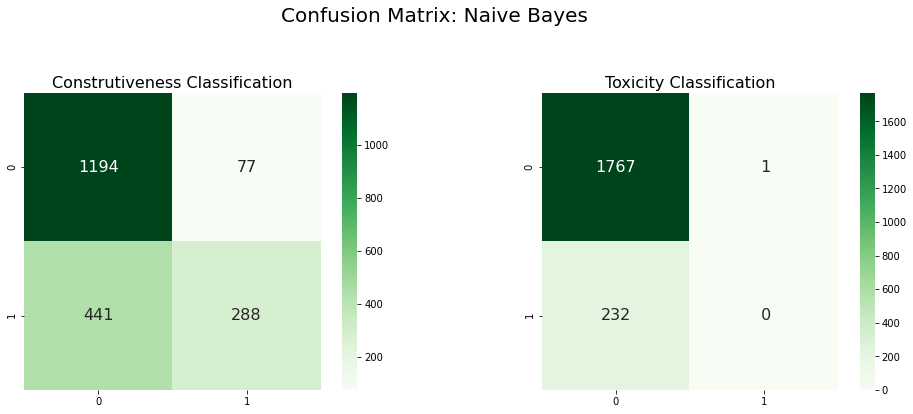

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(17,12))
plt.suptitle('Confusion Matrix: Naive Bayes', fontsize=20)

plt.subplot(2,2,1)
plt.title('Construtiveness Classification', fontsize=16)
cm_cst_nb = confusion_matrix(cst_valid, cst_valid_pred)
df_cm_cst_nb = pd.DataFrame(cm_cst_nb, index=np.unique(le.inverse_transform(cst_train)), columns=np.unique(le.inverse_transform(cst_train)))
sns.heatmap(df_cm_cst_nb, annot=True, square=True, annot_kws={"size": 16}, fmt='2g', cmap='Greens')

plt.subplot(2,2,2)
plt.title('Toxicity Classification', fontsize=16)
cm_txc_nb = confusion_matrix(txc_valid, txc_valid_pred)
df_cm_txc_nb = pd.DataFrame(cm_txc_nb, index=np.unique(le.inverse_transform(txc_train)), columns=np.unique(le.inverse_transform(txc_train)))
sns.heatmap(df_cm_txc_nb, annot=True, square=True, annot_kws={"size": 16}, fmt='2g', cmap='Greens')

## 2.Random Forest

## 3.LSTM

## 4.CNN

## 5.PhoBERT